# Исследование поведения пользователей сервиса аренды самокатов

В нашем распоряжении данные сервиса аренды самокатов GoFast. Мы имеем данные о пользователях из нескольких городов, а также об их поездках. 

**Наша цель:** проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Сервисом можно пользоваться:

**без подписки**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

**с подпиской Ultra**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.
    
**План работы:**
1. Загрузить данные
2. Провести предобработку данных
3. Провести исследовательский анализ данных
4. Объединить данные
5. Подсчитать выручку
6. Проверить гипотезы
7. Сделать общий вывод 
    
**Описание данных:**

В основных данных есть информация о пользователях, их поездках и подписках.

#### Загрузка данных

##### Импортируем необходимые библиотеки pandas. Прочитаем CSV-файлы с данными и сохраним их в датафреймы.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
# Выведем первые 10 строчек датафрейма "Пользователи" на экран
data_user = pd.read_csv('/datasets/users_go.csv', sep=',')
pd.set_option('display.max_columns', None)
data_user.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
# Выведем первые 10 строчек датафрейма "Поездки" на экран
data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
pd.set_option('display.max_columns', None)
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [4]:
# Выведем строчки датафрейма "Подписки" на экран
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
pd.set_option('display.max_columns', None)
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


##### Выведем основную информацию о датафреймах с помощью метода info().

In [5]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**

Изучив общую информацию по датафрейму, мы видим неверные типы данных у столбца с датой в датафрейме **data_rides**.

#### Предобработка данных

##### Приведём столбец date к типу даты pandas.

In [8]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создадим новый столбец с номером месяца на основе столбца date.

In [9]:
data_rides['month'] = data_rides['date'].dt.month
data_rides['month']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month, Length: 18068, dtype: int64

Проверим за сколько лет нам представленны данные:

In [10]:
data_rides['date'].astype('datetime64[M]')

0       2021-01-01
1       2021-01-01
2       2021-04-01
3       2021-08-01
4       2021-08-01
           ...    
18063   2021-11-01
18064   2021-11-01
18065   2021-11-01
18066   2021-11-01
18067   2021-12-01
Name: date, Length: 18068, dtype: datetime64[ns]

##### Проверим наличие пропущенных значений и дубликатов в датафреймах. 


In [11]:
# Количество пропусков в датафрейме "Пользователи"
data_user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
# Количество пропусков в датафрейме "Поездки"
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
# Количество пропусков в датафрейме "Подписки"
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [14]:
# Количество дубликатов в датафрейме "Пользователи"
data_user.duplicated().sum()

31

In [15]:
# Количество дубликатов в датафрейме "Поездки"
data_rides.duplicated().sum() 

0

In [16]:
# Количество дубликатов в датафрейме "Подписки"
data_subscriptions.duplicated().sum()

0

Обработаем дубликаты в датафрейме data_user:

In [17]:
data_user.drop_duplicates(inplace=True)
data_user.duplicated().sum()

0

**Вывод:**

* мы привели к правильному типу данных столбец **date** в датафреме **data_rides**;
* добавили новый столбец **month** с номером имесяца;
* выявили дубликаты только в одном (**data_user**) из трёх датасетов и удалили эти строки-дубликаты. 
* пропуски не были обнаружены.

#### Исследовательский анализ данных. Опишем и визуализируем общую информацию о пользователях и поездках.

##### Частота встречаемости городов:

In [18]:
count_city = data_user['city'].value_counts()
count_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [19]:
# Посчитаем отношение количества городов друг к другу:
count_city['relation'] = round(data_user['city'].value_counts() / count_city.sum(), 2) * 100
count_city['relation']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

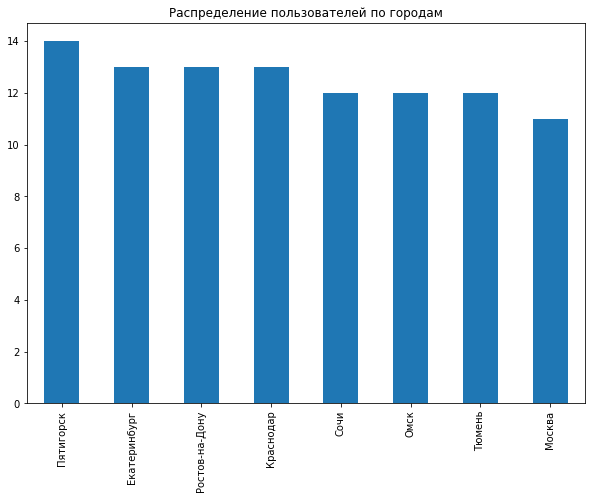

In [20]:
# Визуализируем данное отношение в столбчатой диаграмме:
count_city['relation'].plot.bar( 
    figsize=(10,7), 
    title = 'Распределение пользователей по городам');

Глядя на гистограмму видно, что пользователи сервиса примерно равномерно распределены по всем городам.

##### Соотношение пользователей с подпиской и без подписки:

In [21]:
count_subscription = data_user['subscription_type'].value_counts()
count_subscription

free     835
ultra    699
Name: subscription_type, dtype: int64

In [22]:
# Посчитаем отношение количества пользователей с подпиской и без подписки:
count_subscription['relation_sub'] = round(data_user['subscription_type'].\
                                           value_counts() / count_subscription.sum(), 2) * 100
count_subscription['relation_sub']

free     54.0
ultra    46.0
Name: subscription_type, dtype: float64

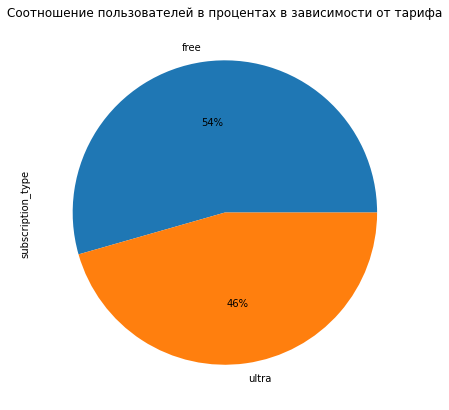

In [23]:
# Визуализируем данное отношение в круговой диаграмме:
data_user['subscription_type'].value_counts().plot(
    kind = 'pie',
    y = count_subscription,
    autopct = '%1.0f%%', 
    figsize=(7,7),
    title = 'Соотношение пользователей в процентах в зависимости от тарифа');

Посмотрев на график, можно понять, что 54% процента пользователей не пользуются подпиской, а 46% её приобрели.

##### Возраст пользователей:

In [24]:
count_age = data_user['age'].sort_values().to_frame().reset_index()
count_age

,index,age
0,664,12
1,66,12
2,727,12
3,34,12
4,235,13
...,...,...
1529,383,38
1530,804,38
1531,453,38
1532,961,39


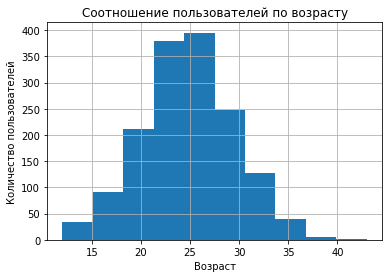

In [25]:
# Визуализируем данное отношение на гистограмме:
plt.hist(data_user['age'], bins = 10)
plt.title('Соотношение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

По гистограмме видно, что пользователи сервиса это люди от 12 до 43 лет, большая часть в возрасте от 22 до 27 лет.

##### Расстояние, которое пользователь преодолел за одну поездку:

In [26]:
count_distance = round(data_rides['distance'].sort_values(), 2).to_frame().reset_index()
count_distance

,index,distance
0,11555,0.86
1,9541,2.57
2,13690,4.33
3,8658,6.78
4,7841,7.10
...,...,...
18063,17242,6724.93
18064,17171,6760.94
18065,15580,6908.49
18066,16484,7066.00


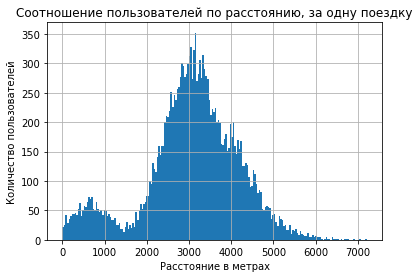

In [27]:
# Визуализируем данное отношение на гистограмме:
plt.hist(data_rides['distance'], bins = 200)
plt.title('Соотношение пользователей по расстоянию, за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

По гистограмме видно, что пик приходится на расстояние от 2,6 до 3,5 километров. 

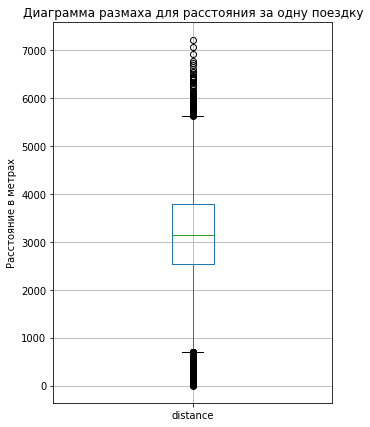

In [28]:
data_rides.boxplot(column=['distance'], figsize=(5,7), grid=True)
plt.title('Диаграмма размаха для расстояния за одну поездку')
plt.ylabel('Расстояние в метрах')
plt.show()

##### Продолжительность поездок:

In [29]:
count_duration = round(data_rides['duration'].sort_values(), 2).to_frame().reset_index()
count_duration

,index,duration
0,12013,0.50
1,17314,0.50
2,15029,0.50
3,7437,0.50
4,12967,0.50
...,...,...
18063,6453,38.27
18064,1998,38.35
18065,2623,39.53
18066,4709,39.87


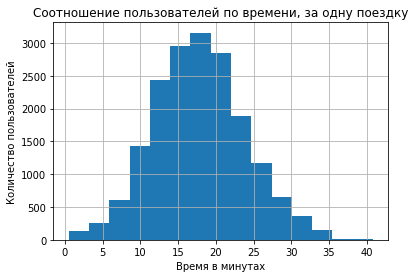

In [30]:
# Визуализируем данное отношение на гистограмме:
plt.hist(data_rides['duration'], bins = 15)
plt.title('Соотношение пользователей по времени, за одну поездку')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

По гистограмме видно, что пользователь находится в дороге в среднем от 14 до 22 минут.

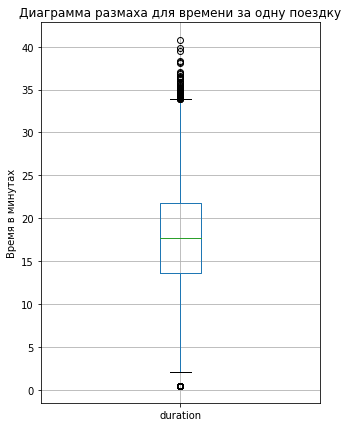

In [31]:
data_rides.boxplot(column=['duration'], figsize=(5,7), grid=True)
plt.title('Диаграмма размаха для времени за одну поездку')
plt.ylabel('Время в минутах')
plt.show()

Краткий вывод:

Пользователи сервиса GoFast распределены по всем городам примерно равномерно. Большего всего находится пользователей в городе Пятигорск (219), а меньше всего - в Москве (168). Можно объяснить этот факт тем, что в Москве очень много сервисов, которые могут предоставить тебе самокаты, поэтому малое количество пользуется именно сервисом GoFast, а в Пятигорске, возможно, он основной, поэтому у пользователей не большой выбор.

Про соотношение пользователей с подпиской и без можно сказать, что тоже приблизительно одинаковое соотношение - 46% и 54% соответственно.

Возраст пользователей варьируется от 12 до 43 лет. Чаще всего самокатами пользуются люди 22-27 лет.

Самое большое расстояние, которые смогли проехать примерно 7 километров, а наименьшее - 0,86 метров. В среднем люди проезжают от 2,6 до 3,5 километров.

Среднее время поездки составляет от 14 и до 22 минут. Самое большое время за поездку - почти 41 минута. а наименьшее - 30 секунд. Скорее всего такое малое количество может говорить о том, что самокат стал неисправен после того, как его включили и поехали, либо пользователь передумал его использовать.

#### Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [32]:
service = data_user.merge(data_rides)
service = service.merge(data_subscriptions)
service

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [33]:
# Проверим наличие пропусков:
service.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [34]:
# Проверим размерность и общую информацию по датафрейму:
service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Пропуски не были обнаружены. Размерность датафрейма - 18068 строк, такое количество, что и было вначале у датафрейма **data_rides**.

##### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: c данными о пользователях без подписки и с данными о пользователях с подпиской.

In [35]:
service_free = service.query("`subscription_type` == 'free'")
service_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [36]:
service_ultra = service.query("`subscription_type` == 'ultra'")
service_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

Создадим график, на котором будут находится две гистограммы о расстоянии поездок, которые относятся к пользователям с подпиской и без.

<AxesSubplot:ylabel='Frequency'>

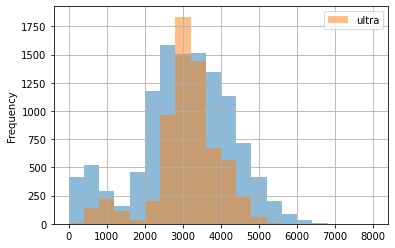

In [37]:
ax = service_free['distance'].plot(
    kind='hist',
    range=(0, 8000),
    bins=20,
    label='free',
    alpha=0.5,
)

service_ultra['distance'].plot(
    kind='hist',
    range=(0, 8000),
    bins=20,
    alpha=0.5,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 

Создадим график, на котором будут находится две гистограммы о времени поездок, которые относятся к пользователям с подпиской и без.

<AxesSubplot:ylabel='Frequency'>

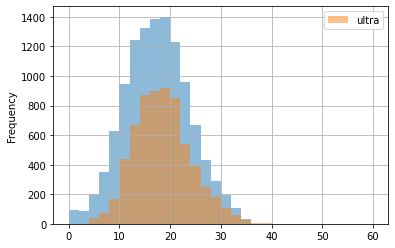

In [38]:
av = service_free['duration'].plot(
    kind='hist',
    range=(0, 60),
    bins=30,
    label='free',
    alpha=0.5,
)

service_ultra['duration'].plot(
    kind='hist',
    range=(0, 60),
    bins=30,
    alpha=0.5,
    label='ultra',
    ax=av,
    grid=True,
    legend=True,
) 

Мы сделали два отдельных датафрейма для пользователей с подпиской и без - service_ultra и service_free соответственно.

По итогу сравнения двух категорий пользователей, такие выводы: без подписки люди ездят на более длинные расстояния, чем те, у кого есть подписка. Люди, которые не пользуются подпиской ездят в среднем на расстояния от 2 до 4,5 километров, по времени от 10 до 25 минут. С подпиской люди проезжают на самокате от 2,5 до 3,5 километров, по времени - от 15 до 22 минут.


#### Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [39]:
service['duration'] = np.ceil(service['duration']) 
service_month= pd.pivot_table(service,
                           index=['user_id', 'month'],
                           values = ['distance', 'duration', 'subscription_type', 'name'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len,
                                      'subscription_type' : min})

service_month.rename(columns = {'name' : 'trips'}, inplace = True)
service_month

distance  duration  trips subscription_type
user_id month                                                 
1       1       7027.511294      42.0      2             ultra
        4        754.159807       7.0      1             ultra
        8       6723.470560      46.0      2             ultra
        10      5809.911100      32.0      2             ultra
        11      7003.499363      56.0      3             ultra
...                     ...       ...    ...               ...
1534    6       3409.468534      26.0      2              free
        8       7622.453034      48.0      2              free
        9       4928.173852      23.0      1              free
        11     13350.015305      78.0      4              free
        12      2371.711192      16.0      1              free

[11331 rows x 4 columns]

##### В этот же датафрейм добавим столбец 'revenue' с помесячной выручкой, которую принёс каждый пользователь. 

Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [40]:
def revenue_month(row):
    if row['subscription_type'] == 'ultra':
        return 0 * row['trips'] + 6 * row['duration'] + 199
    else:
        return 50 * row['trips'] + 8 * row['duration'] + 0
 

In [41]:
service_month['revenue'] = service_month.apply(revenue_month, axis=1)
service_month

distance  duration  trips subscription_type  revenue
user_id month                                                          
1       1       7027.511294      42.0      2             ultra    451.0
        4        754.159807       7.0      1             ultra    241.0
        8       6723.470560      46.0      2             ultra    475.0
        10      5809.911100      32.0      2             ultra    391.0
        11      7003.499363      56.0      3             ultra    535.0
...                     ...       ...    ...               ...      ...
1534    6       3409.468534      26.0      2              free    308.0
        8       7622.453034      48.0      2              free    484.0
        9       4928.173852      23.0      1              free    234.0
        11     13350.015305      78.0      4              free    824.0
        12      2371.711192      16.0      1              free    178.0

[11331 rows x 5 columns]

Мы нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, для этого создали отдельный датафрейм service_month. Добавили в него столбец 'revenue', в котором при помощи формулы посчитали помесячную выручку с каждого пользователя.

#### Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Нулевая гипотеза: средние значения времени пользователей из двух групп равны.

Альтернативная гипотеза: среднее значение времени пользователей с подпиской больше, чем среднее значение времени пользователей без подписки

In [42]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(service_ultra['duration'], service_free['duration'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [43]:
# Среднее значение времени для пользователей с подпиской
mean_duration_ultra = np.mean(service_ultra['duration'])
print('Среднее время для пользователей с подпиской (service_ultra):', mean_duration_ultra)

# Среднее значение времени для пользователей без подписки
mean_duration_free = np.mean(service_free['duration'])
print('Среднее время для пользователей без подписки (service_free):', mean_duration_free)

Среднее время для пользователей с подпиской (service_ultra): 18.54198516280583
Среднее время для пользователей без подписки (service_free): 17.39090929866399


Полученное значение p-value ~ 1,28*10^(−34) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской проводят в сервисе больше времени (среднее значение первой генеральной совокупности больше среднего значения второй генеральной совокупности). Таким образом пользователи с подпиской могут быть «выгоднее» для компании.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Необходимо проверить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метрам.

Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает оптимальное значение 3130 метров.

Проверим гипотезы и сделаем выводы:

In [44]:
optimal_distance = 3130.0

alpha = 0.05

results = st.ttest_1samp(service_ultra['distance'], optimal_distance, alternative='greater')
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Полученное значение p-value ~ 0.92 больше заданного уровня значимости. То есть нельзя утверждать, что расстояние, которое проехали пользователи с подпиской превышает 3130 метров.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

Проверим гипотезы и сделаем выводы:

In [45]:
results = st.ttest_ind(service_month.loc[service_month['subscription_type'] == 'ultra', 'revenue'], 
                       service_month.loc[service_month['subscription_type'] == 'free', 'revenue'] , 
                       alternative = 'greater')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value ~ 2.81*10^(−35) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше денег.

##### У нас есть ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения.

Так как мы интересуемся только одним направлением изменения, например, уменьшения количества обращаений после обновления, то это будет означать одностороннюю гипотезу.

Нулевая гипотеза (H0) может быть сформулирована так: "Среднее количество обращений до обновления равно среднему количеству обращений после обновления".

Альтернативная гипотеза (H1) будет звучать как: "Среднее количество обращений после обновления меньше, чем среднее количество обращений до обновления."

* H0: μ1 = μ2
* H1: μ1 > μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: **scipy.stats.ttest_ind()**

Если мы отвергаем нулевую гипотезу в пользу альтернативной, то среднее количество обращений после обновления меньше среднего количества до обновления. Иначе, мы не можем отвергнуть нулевую гипотезу: обновление серверов, возможно, не повлияло на количество обращений в техподдержку.

#### Общий вывод

Мы провели работу с данными серивиса аренды самокатов GoFast. 

***1) Загрузка данных:***

У нас было три файла с данными о пользователях, поездках и подписках. Мы их сохранили в три датафрейма - **data_user**,  **data_rides** и **data_subscriptions** соответственно. 

***2) Предобработка данных:***
* Мы обнаружили только неверный тип данных у столбца с датой в датафрейме data_rides. Изменили тип дынных **object** на **datetime64**. 
* Создали новый столбец **month** с номером месяца на основе столбца **date**. 
* Проверили датавреймы на пропуски, пропущенных значений не оказалось. 
* выявили дубликаты дубликаты в **data_user** и удалили эти строки-дубликаты.

***3) Исследовательский анализ данных.***

Частота встречаемости городов: 
 - Пользователи сервиса GoFast распределены по всем городам примерно равномерно. 
 - Большего всего находится пользователей в городе Пятигорск **(219)**, а меньше всего - в Москве **(168)**. Объяснили мы этот факт тем, что в Москве очень много сервисов, которые могут предоставить тебе самокаты, поэтому малое количество пользуется именно сервисом GoFast, а в Пятигорске, возможно, он основной, поэтому у пользователей не большой выбор. 

Соотношение пользователей с подпиской и без подписки:
- Соотношение пользователей с подпиской и без тоже приблизительно одинаковое - **46%** и **54%** соответственно. 

Возраст пользователей:
- Варьируется от **12** до **43 лет**. 
- Чаще всего самокатами пользуются люди **22-26** лет.

Расстояние, которое пользователь преодолел за одну поездку:      
- Самое большое расстояние, которые смогли проехать примерно **7 километров**, а наименьшее - **0,86 метров**. В среднем люди проезжают от **2,6** до **3,8** километров. 

Продолжительность поездок:        
- Среднее время поездки составляет от **14** и до **22** минут. Самое большое время за поездку - почти **41** минута. а наименьшее - **30** секунд. Скорее всего такое малое количество может говорить о том, что самокат стал неисправен после того, как его включили и поехали, либо пользователь передумал его использовать.
        
***4) Объединение данных.***

Далее мы объединили данные о пользователях, поездках и подписках в один датафрейм - **service**. 
После создали ещё два датафрейма из датафрейма, созданного ранее: c данными о пользователях без подписки и с данными о пользователях с подпиской - **service_free** и **service_ultra** соответственно. Для того, чтобы сравнить эти две категории пользователей мы визуализировали информацию по этим двум датафреймам.

**По итогу пришли к таким заключениям:**
* Без подписки люди ездят на более длинные расстояния, чем те, у кого есть подписка. 
* Люди, которые не пользуются подпиской, ездят в среднем на расстояния от **2** до **4,5** километров, по времени от **10** до **25** минут.
* С подпиской люди проезжают на самокате от **2,5** до **3,5** километров, по времени - от **15** до **22** минут.

***5) Подсчёт выручки.***

Мы нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, для этого при помощи сводной таблицы создали отдельный датафрейм - **service_month**. В этот же датафрейм добавили столбец **revenue** с помесячной выручкой, которую принёс каждый пользователь. 

*Помесячная выручка посчитали по такой формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.*


***6) Проверка гипотез.***
1. Тратят ли пользователи с подпиской больше времени на поездки?

Действительно, пользователи с подпиской проводят в сервисе больше времени. Таким образом пользователи с подпиской могут быть **«выгоднее»** для компании. Среднее время для пользователей с подпиской: **18.54 минут**. Среднее время для пользователей без подписки - **17.39 минут**

2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Получилось так, что нельзя утверждать, что расстояние, которое проехали пользователи с подпиской превышает 3130 метров.

3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Есть основания говорить, что подписчики тратят в сервисе больше денег, так как выручка от них больше.

**Подводя итоги, можно сказать:**
- Пользователи с подпиской тратят больше времени на поездки, что указывает на то, что они более активно используют сервис.

- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Это означает, что пользователи с подпиской, вероятно, совершают короткие поездки, но делают их чаще.

- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Это свидетельствует о том, что пользователи с подпиской приносят компании больше денег.

**С учетом этих результатов, можно сделать вывод, что пользователи с подпиской являются более выгодными для компании. Они активнее пользуются сервисом, тратят больше времени на поездки и, как следствие, приносят больше выручки.**